In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import cv2
from sklearn.model_selection import train_test_split

np.random.seed(0)


In [3]:
# Load data into dataframe
training_data_folder = 'asl_alphabet_train'
data = []

for folder in sorted(os.listdir(training_data_folder)):
    sub_folder = os.path.join(training_data_folder,folder)
    files = [{'label':folder,'path':os.path.join(sub_folder, f)} for f in os.listdir(sub_folder) if os.path.isfile(os.path.join(sub_folder, f))]
    data += files

df = pd.DataFrame(data)

In [4]:

# df.head()

In [5]:
# df.tail()

In [6]:
df.to_csv("labelPath.csv",index=False)

In [7]:
df2 = pd.read_csv('labelPath.csv')
df2.head()

,label,path
0,A,asl_alphabet_train\A\A1.jpg
1,A,asl_alphabet_train\A\A10.jpg
2,A,asl_alphabet_train\A\A100.jpg
3,A,asl_alphabet_train\A\A1000.jpg
4,A,asl_alphabet_train\A\A1001.jpg


In [8]:
# len(df2) # 3000*29

In [9]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

# map_characters
order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                   'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                 'T',  'U',  'V',  'W',  'X',  'Y',  'Z',  'del',  'nothing',  'space')

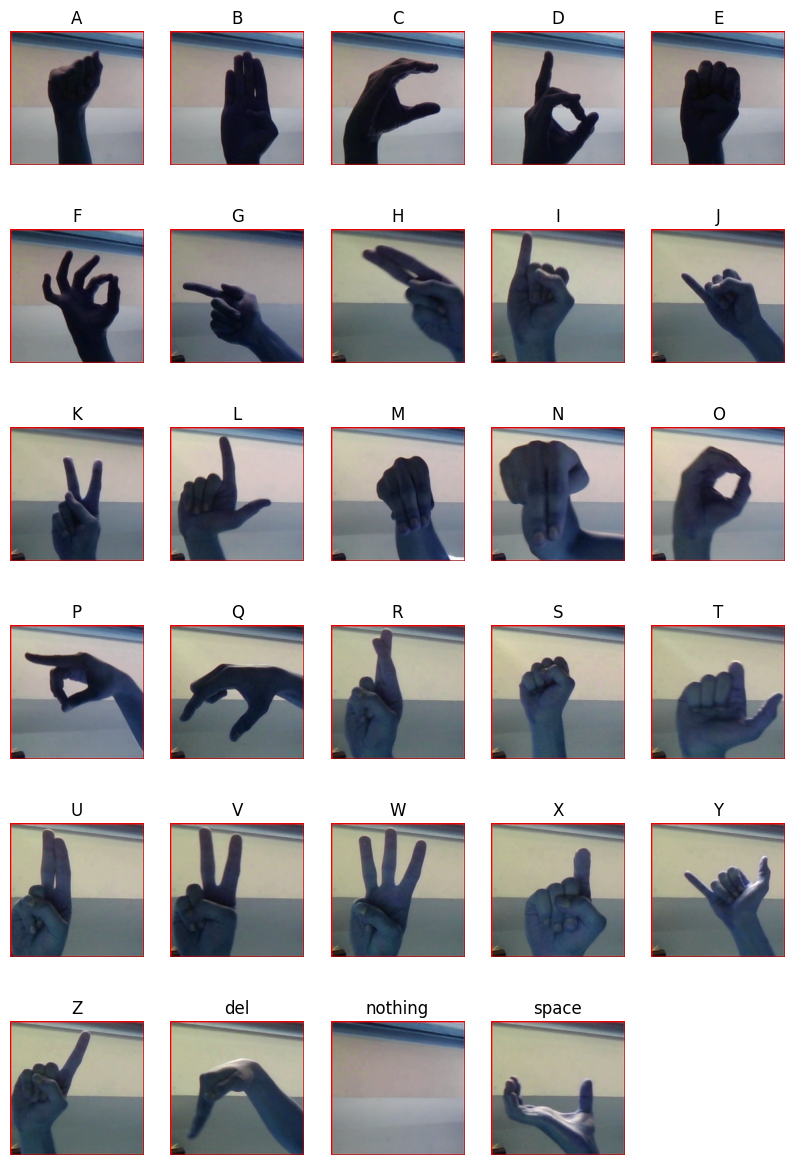

In [10]:

plt.figure(figsize=(10, 15))
for i in range(29):
    path=df2.loc[i*3000, "path"]
    label=df2.loc[i*3000, "label"]
    ax = plt.subplot(6,5 , i + 1)
    plt.imshow(cv2.imread(path),cmap=plt.cm.binary)
    plt.title(label)
    plt.axis("off")
plt.show()
    

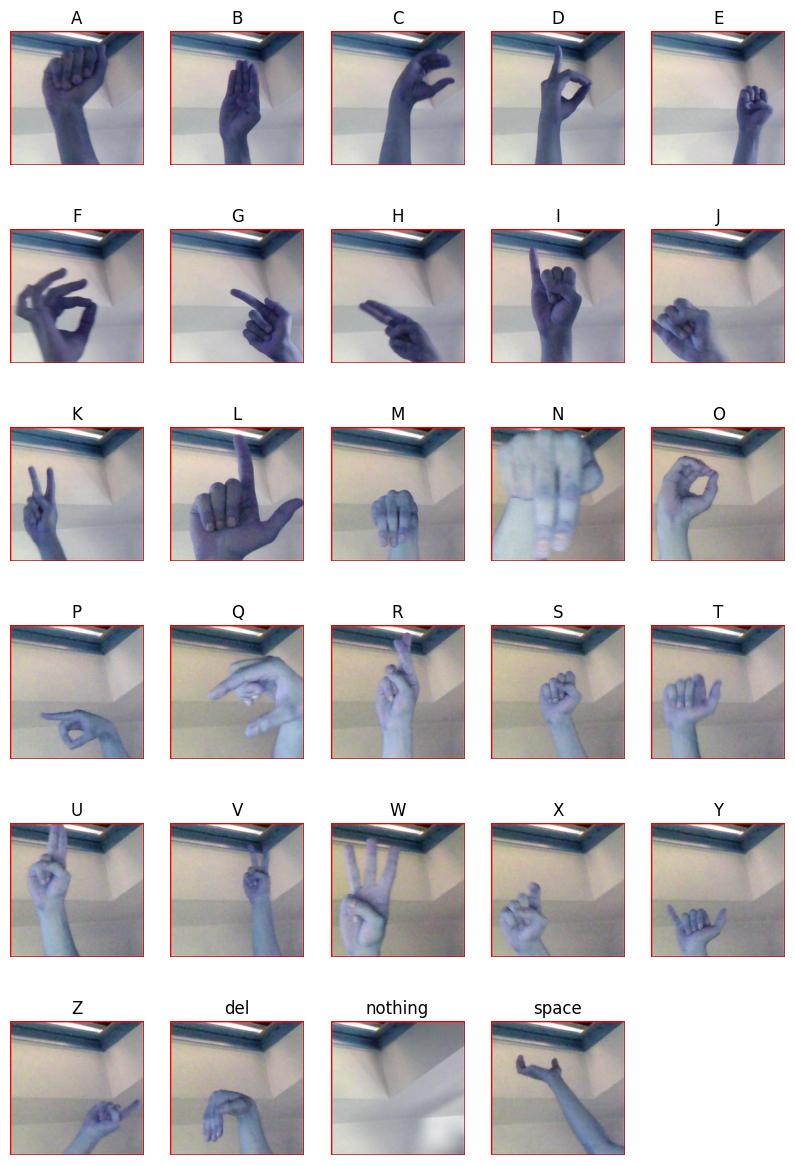

In [11]:
plt.figure(figsize=(10, 15))
for i in range(29):
    path=df2.loc[i*3000+200, "path"]
    label=df2.loc[i*3000+200, "label"]
    ax = plt.subplot(6,5 , i + 1)
    plt.imshow(cv2.imread(path),cmap=plt.cm.binary)
    plt.title(label)
    plt.axis("off")
plt.show()

In [12]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
# y_train=lb.fit_transform(train_label)
# y_test=lb.fit_transform(test_label)
# hotEncodedLabels=lb.fit_transform(df2['label'])
hotEncodedLabels=lb.fit_transform(order_list)



In [13]:
hotEncodedLabels

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
len(hotEncodedLabels)

29

In [15]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:
train_dir="asl_alphabet_train"

labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'del':26,'nothing':27,'space':28}


map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image, 0) # greyscale
            temp_img = cv2.resize(temp_img, size)
            temp_img = temp_img.flatten()
            images.append(temp_img)
            labels.append(hotEncodedLabels[labels_dict[folder]])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3, random_state=42)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size = 0.8,random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_validation),'images for validation','validation data shape =',X_validation.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

    
    return X_train, X_test, Y_train, Y_test, X_validation, Y_validation

In [17]:
X_train, X_test, Y_train, Y_test, X_validation, Y_validation= load_data()

LOADING DATA FROM : A | B | C | D | del | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Loaded 60900 images for training, Train data shape = (60900, 4096)
Loaded 20880 images for validation validation data shape = (20880, 4096)
Loaded 5220 images for testing Test data shape = (5220, 4096)


In [18]:
print(X_train[0])
print(len(X_train[0]))


[0.10588235 0.14117648 0.13333334 ... 0.6784314  0.69411767 0.69411767]
4096


In [19]:
Y_train[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [20]:
print(len(X_train))
print(len(Y_train))

60900
60900


In [22]:
categories = 29
features= 4096
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, categories])
W = tf.Variable(tf.zeros([features,categories]))
b = tf.Variable(tf.zeros([categories]))

z = tf.matmul(x, W) +b 
pred = tf.nn.softmax(z) 
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_, z))
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

data_x=np.array(X_train)
data_y=np.array(Y_train)


    


In [23]:
print(len(data_x))
print(len(data_y))

60900
60900


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(len(data_x)):
	sess.run(update, feed_dict = {x:data_x, y_:data_y}) 
	if i%1000 == 0:
		print(i)

line=["w"]
my_w=sess.run(W)
for i in range(len(my_w)):
	line.append(str(my_w[i]))
line.append("b")
my_b=sess.run(b)
for i in range(len(my_b)):
	line.append(str(my_b[i]))

with open('weights_and_b_23-24_11_3len+len_img.txt', 'w') as f:
	for l in line:
		f.write(l)
		f.write('\n')	
	



0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000


In [ ]:
print(sess.run(W).shape)
print(sess.run(W))


(4096, 29)
[[-0.00757057 -0.00649647 -0.00621972 ...  0.0115516  -0.00925888
   0.00366577]
 [-0.00670057 -0.00570014 -0.00723361 ...  0.00908192 -0.00917659
   0.00405688]
 [-0.00551709 -0.00571857 -0.00623864 ...  0.00994034 -0.0109895
   0.00323304]
 ...
 [ 0.0103832   0.02322222  0.00427145 ... -0.08804422 -0.02419449
  -0.02917136]
 [ 0.01037855  0.02165549  0.00713187 ... -0.09200947 -0.02524883
  -0.02356037]
 [ 0.00444313  0.01462976  0.00470126 ... -0.08728769 -0.0253563
  -0.01564159]]


In [ ]:
print(sess.run(b).shape)
print(sess.run(b))

(29,)
[-0.05818962 -0.05698532 -0.09670166 -0.07025669 -0.03677428 -0.01784191
  0.16463642  0.0952803   0.03071084  0.04243987 -0.01343091 -0.11290579
 -0.04704174  0.01098109 -0.11700542  0.01909144  0.01636194  0.00826621
 -0.05160822  0.01621419 -0.0036001   0.05618276  0.02157656  0.10629079
  0.03665826  0.0028142   0.12294738 -0.12466361  0.05655485]


In [ ]:
pred=tf.nn.softmax(sess.run(z, feed_dict = {x:X_validation}))
print(pred)
print(sess.run(pred))


Tensor("Softmax_2:0", shape=(20880, 29), dtype=float32)
[[0.00479202 0.00642483 0.01782462 ... 0.03412534 0.00494589 0.06597169]
 [0.00770995 0.01207602 0.0142348  ... 0.01200283 0.00286779 0.03587069]
 [0.00102514 0.00199485 0.01342502 ... 0.01828031 0.0001816  0.00202354]
 ...
 [0.02440187 0.05498411 0.18112747 ... 0.00123039 0.01473985 0.00801527]
 [0.0057936  0.00739763 0.00759932 ... 0.01728137 0.0028063  0.06676486]
 [0.00473838 0.01048426 0.00992513 ... 0.06048629 0.0018074  0.05949425]]


In [ ]:
accuracy=0

for j in range(len(X_validation)):
    test1=sess.run(pred[j])
    maxx =0
    spot =0
    p_val=np.argmax(test1)
    pred_val=map_characters[p_val]
    t_val=np.argmax(Y_validation[j])

    true_val=map_characters[t_val]
    if pred_val==true_val:
        accuracy+=1
    if j%1000==0:
        print(j)
print("accuracy= ",accuracy/len(X_validation))


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
ac=accuracy/len(X_validation)
print(ac)

0.4943486590038314
